In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')

In [6]:
pd.get_dummies(df,dtype='int')

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


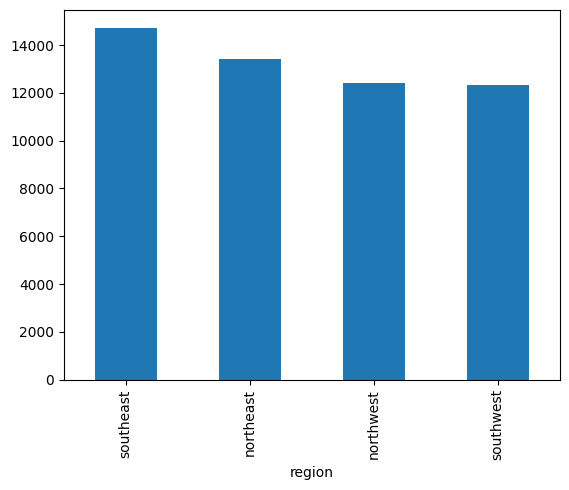

In [23]:
df.groupby('region')['charges'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

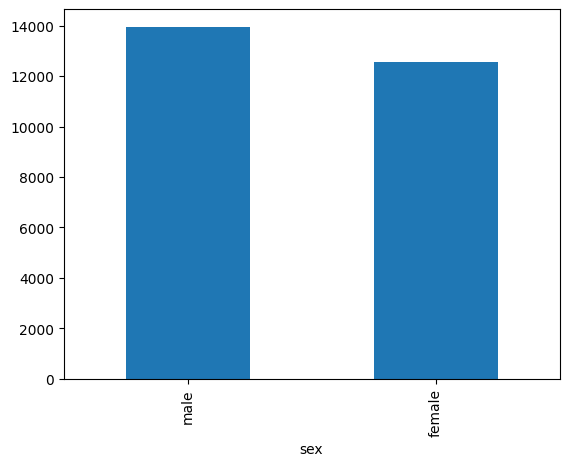

In [22]:
df.groupby('sex')['charges'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

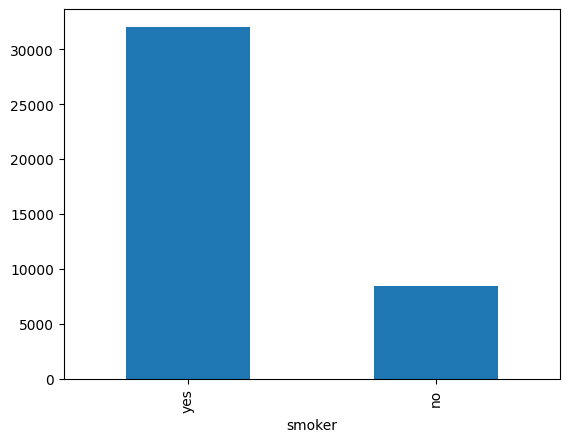

In [25]:
df.groupby('smoker')['charges'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [34]:
df['age_group'] = pd.qcut(df['age'],q=10)

In [35]:
df

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,"(17.999, 19.0]"
1,18,male,33.770,1,no,southeast,1725.55230,"(17.999, 19.0]"
2,28,male,33.000,3,no,southeast,4449.46200,"(24.0, 29.0]"
3,33,male,22.705,0,no,northwest,21984.47061,"(29.0, 34.0]"
4,32,male,28.880,0,no,northwest,3866.85520,"(29.0, 34.0]"
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(49.0, 54.0]"
1334,18,female,31.920,0,no,northeast,2205.98080,"(17.999, 19.0]"
1335,18,female,36.850,0,no,southeast,1629.83350,"(17.999, 19.0]"
1336,21,female,25.800,0,no,southwest,2007.94500,"(19.0, 24.0]"


In [37]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.90,0,yes,southwest,16884.9240,"(17.999, 19.0]"
1,18,male,33.77,1,no,southeast,1725.5523,"(17.999, 19.0]"


In [39]:
df = df[['age','sex','bmi','smoker','charges']]

In [40]:
df

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [43]:
df=pd.get_dummies(df,dtype='int')

In [49]:
X = df.drop(columns='charges')

In [50]:
y = df['charges']

In [51]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [52]:
train_test_split(X,y)

[      age     bmi  sex_female  sex_male  smoker_no  smoker_yes
 736    37  38.390           1         0          0           1
 1290   38  19.950           1         0          1           0
 564    18  32.120           1         0          1           0
 862    55  33.535           1         0          1           0
 894    62  32.110           0         1          1           0
 ...   ...     ...         ...       ...        ...         ...
 608    28  26.980           0         1          1           0
 872    42  24.860           0         1          1           0
 353    33  35.245           0         1          1           0
 642    61  33.915           0         1          1           0
 1313   19  34.700           1         0          0           1
 
 [1003 rows x 6 columns],
       age     bmi  sex_female  sex_male  smoker_no  smoker_yes
 601    51  31.635           0         1          1           0
 380    27  17.955           1         0          0           1
 284    52  

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
X_train

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
491,61,25.080,1,0,1,0
1296,18,26.125,0,1,1,0
1129,19,18.600,1,0,1,0
1171,43,26.700,1,0,0,1
969,39,34.320,1,0,1,0
...,...,...,...,...,...,...
586,21,20.235,0,1,1,0
1267,24,31.065,0,1,0,1
811,33,42.940,1,0,1,0
1254,34,27.720,1,0,1,0


In [58]:
len(df)

1338

In [59]:
lin_reg = LinearRegression()

In [60]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [64]:
lin_reg.score(X_test,y_test)

0.7567385402316295

In [109]:
X_test.iloc[[1]]

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
617,49,25.6,0,1,0,1


In [99]:
X_test.iloc[0]

age           29.00
bmi           21.85
sex_female     1.00
sex_male       0.00
smoker_no      0.00
smoker_yes     1.00
Name: 1306, dtype: float64

In [101]:
y_test.iloc[0]

16115.3045

In [110]:
lin_reg.predict(X_test.iloc[[1]])

array([32430.86270876])

In [72]:
y_test

1306    16115.30450
617     23306.54700
736     40419.01910
18      10602.38500
443     28287.89766
           ...     
1173     6457.84340
1274    17043.34140
575     12222.89830
1292     1515.34490
517      8413.46305
Name: charges, Length: 268, dtype: float64

In [ ]:
19 27.900 female yes	16884.92400

In [74]:
X_test

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
1306,29,21.850,1,0,0,1
617,49,25.600,0,1,0,1
736,37,38.390,1,0,0,1
18,56,40.300,0,1,1,0
443,59,36.520,1,0,1,0
...,...,...,...,...,...,...
1173,38,29.260,0,1,1,0
1274,26,27.060,0,1,0,1
575,58,27.170,1,0,1,0
1292,21,23.210,0,1,1,0


In [77]:
y_test.reset_index(drop=True)

0      16115.30450
1      23306.54700
2      40419.01910
3      10602.38500
4      28287.89766
          ...     
263     6457.84340
264    17043.34140
265    12222.89830
266     1515.34490
267     8413.46305
Name: charges, Length: 268, dtype: float64

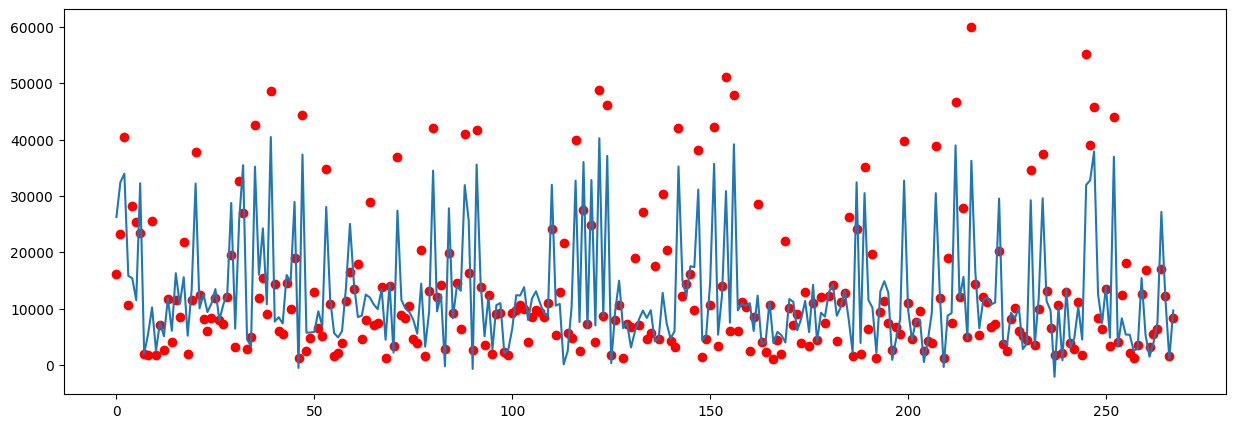

In [89]:
plt.figure(figsize=(15,5))
plt.plot(lin_reg.predict(X_test.reset_index(drop=True)))
plt.scatter(y_test.reset_index(drop=True).index,y_test.reset_index(drop=True),c='r')
plt.show()

In [68]:
y

491     24513.09126
1296     1708.92575
1129     1728.89700
1171    22478.60000
969      8596.82780
           ...     
586      3861.20965
1267    34254.05335
811      6360.99360
1254     4415.15880
1172    11093.62290
Name: charges, Length: 1070, dtype: float64

In [90]:
import pickle


In [94]:
pickle.dump(lin_reg,open('model.pkl','wb'))